In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mnist = pd.read_csv('figs_mnist_l1/raw.txt', delimiter=' ')
cifar = pd.read_csv('figs_cifar_l1/raw.txt', delimiter=' ')
trans = pd.read_csv('figs_trans_l1/raw.txt', delimiter=' ')

In [70]:
mnist

,Loss,Lambda1,2/eta,sam_edge,||g||_2,||g_sam||_2,||g||_1,||g_sam||_1,g_alignment,sg_alignment
0,0.094620,2.539977,200.0,16.447920,0.147388,0.179147,2.571677,3.473034,0.256859,0.307919
1,0.089870,2.665117,200.0,14.181197,0.108227,0.113799,1.376292,1.490003,0.005357,0.006493
2,0.086967,2.632448,200.0,13.718428,0.101027,0.103987,1.234783,1.279789,0.004566,0.005968
3,0.084415,2.642198,200.0,13.432963,0.096718,0.099306,1.169998,1.207979,0.000363,0.001194
4,0.082076,2.539357,200.0,13.176719,0.092936,0.095281,1.117278,1.148837,0.000417,0.001534
...,...,...,...,...,...,...,...,...,...,...
89,0.036880,3.641152,200.0,6.806288,0.023979,0.024095,0.257269,0.258231,0.000304,0.007769
90,0.036744,3.718980,200.0,6.784195,0.023821,0.023934,0.255379,0.256364,0.000110,0.002640
91,0.036609,3.458529,200.0,6.762702,0.023667,0.023779,0.253555,0.254635,0.000169,0.000695
92,0.036476,3.688562,200.0,6.741598,0.023517,0.023626,0.251927,0.252824,0.000204,0.008930


In [93]:
def plotting(df, dataset_name):
    fig1, ax1 = plt.subplots();
    ax2 = ax1.twinx();
    ax1.plot(df[['g_alignment', 'sg_alignment']], label=['g alignment', 'sg_alignment'])
    ax1.set_yscale('log')
    ax2.plot(df[['Lambda1']], color='red', linestyle='-', alpha=0.2, label='$\|H\|_{op}$')
    ax1.legend();
    ax2.legend();
    ax2.set_ylabel('$\|H\|_{op}$')
    ax1.set_ylabel('Gradient Alignment')
    ax1.set_xlabel('Iterations');
    ax1.set_title(dataset_name+' - Gradient Alignment vs. Hessian Operator Norm');
    fig1.savefig(dataset_name+'_grad_alignment.pdf',  format="pdf", dpi=300);

    fig2, ax1 = plt.subplots();
    ax2 = ax1.twinx();
    ax1.plot(df[['||g||_1', '||g_sam||_1']], label=['$\|g\|_1$', '$\|g_{sam}\|_1$'])
    ax1.plot(df[['||g||_2', '||g_sam||_2']], label=['$\|g\|_2$', '$\|g_{sam}\|_2$'])
    ax1.set_yscale('log')
    ax2.plot(df[['Loss']], color='red', linestyle='-', alpha=0.2, label='Loss');
    ax1.legend();
    ax2.legend(loc=2);
    ax1.set_xlabel('Iterations');
    ax2.set_ylabel('Loss');
    ax1.set_ylabel('Gradient Norm')
    ax1.set_title(dataset_name+' - Gradient Norms vs. Loss');
    fig2.savefig(dataset_name+'_grad_norms.pdf',  format="pdf", dpi=300);
    return

In [ ]:
plotting(mnist, 'MNIST');
plotting(cifar, 'CIFAR')

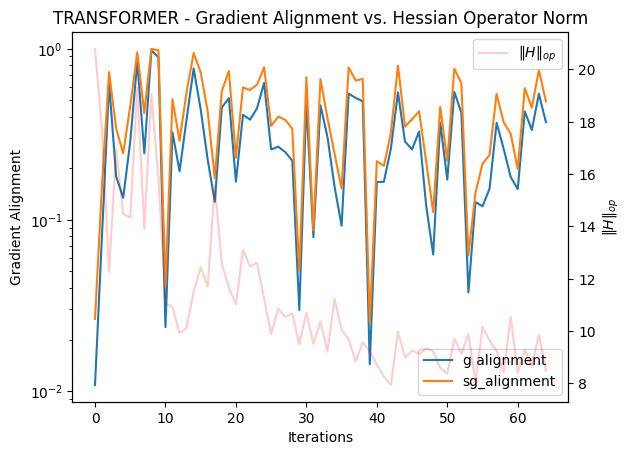

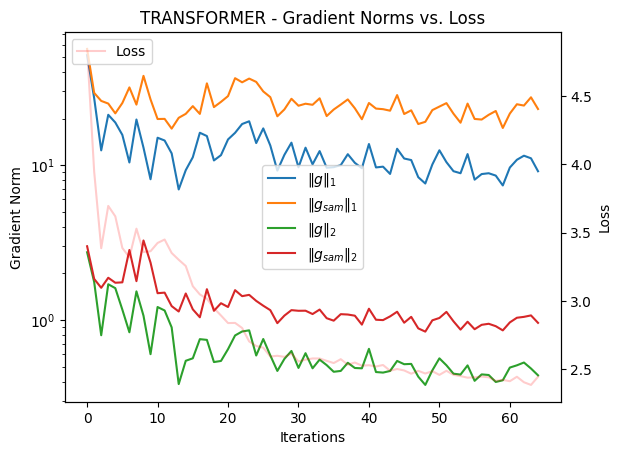

In [94]:
plotting(trans, 'TRANSFORMER')

## SSAM

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cifar_ssam = pd.read_csv('figs/raw.txt', delimiter=' ')

In [ ]:
def plotting_ssam(df, dataset_name):
    fig1, ax1 = plt.subplots();
    ax2 = ax1.twinx();
    ax1.plot(df[['g_alignment', 'sg_alignment', 'ssg_alignment']], label=['g alignment', 'sg_alignment', 'ssg_alignment'])
    ax1.set_yscale('log')
    ax2.plot(df[['Lambda1']], color='red', linestyle='-', alpha=0.2, label='$\|H\|_{op}$')
    ax1.legend();
    ax2.legend();
    ax2.set_ylabel('$\|H\|_{op}$')
    ax1.set_ylabel('Gradient Alignment')
    ax1.set_xlabel('Iterations');
    ax1.set_title(dataset_name+' - Gradient Alignment vs. Hessian Operator Norm');
    fig1.savefig(dataset_name+'_ssam_grad_alignment.pdf',  format="pdf", dpi=300);

    fig2, ax1 = plt.subplots();
    ax2 = ax1.twinx();
    ax1.plot(df[['||g||_1', '||g_sam||_1', '||g_ssam||_1']], label=['$\|g\|_1$', '$\|g_{sam}\|_1$', '$\|g_{ssam}\|_1$'])
    ax1.plot(df[['||g||_2', '||g_sam||_2', '||g_ssam||_2']], label=['$\|g\|_2$', '$\|g_{sam}\|_2$', '$\|g_{ssam}\|_2$'])
    ax1.set_yscale('log')
    ax2.plot(df[['Loss']], color='red', linestyle='-', alpha=0.2, label='Loss');
    ax1.legend();
    ax2.legend(loc=2);
    ax1.set_xlabel('Iterations');
    ax2.set_ylabel('Loss');
    ax1.set_ylabel('Gradient Norm')
    ax1.set_title(dataset_name+' - Gradient Norms vs. Loss');
    fig2.savefig(dataset_name+'_ssam_grad_norms.pdf',  format="pdf", dpi=300);
    return